# Graph Based Spin Lattice

### Find lowest ground state of simple Ising Hamiltonian
For a graph, $G = (E,V)$, defined by a set of edges, $E$, and vertices, $V$, we want to represent an Ising model, where the edge weights, $w_{ij}$ are given by the spin interactions, i.e., $w_{ij} = J_{ij}$.

Given a configuration of spins (e.g., $\uparrow\downarrow\downarrow\uparrow\downarrow$) we can define the energy using what is referred to as an Ising Hamiltonian:
$$ \hat{H} = \sum_{(i,j)\in E}J_{ij} s_is_j$$
where, $s_i=1$ if the $i^{th}$ spin is `up` and $s_i=-1$ if it is `down`, and the sumation runs over all edges in the graph. 


In [16]:
# Load relevant libraries. If you have errors you probably need to install them into your conda env

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
import scipy
random.seed(2)

### Create a graph that defines the Ising interactions

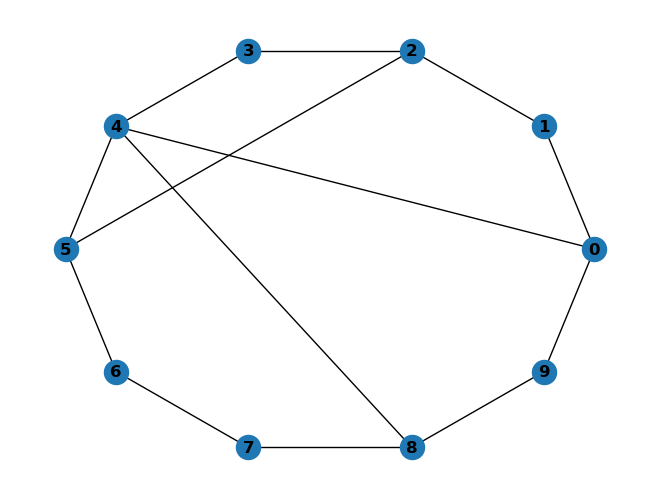

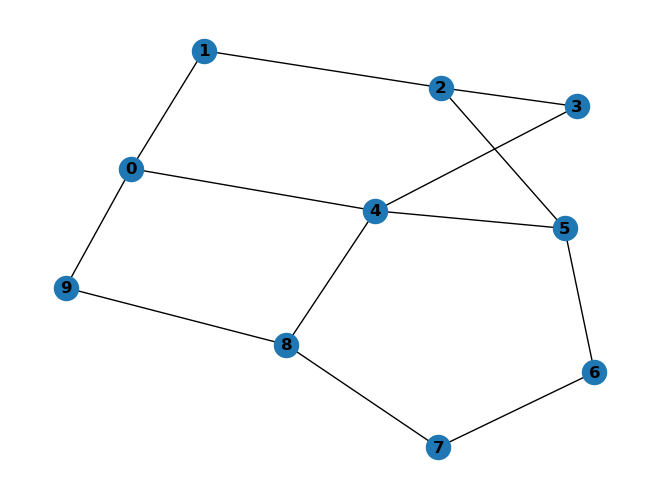

In [17]:
G = nx.Graph()
G.add_nodes_from([i for i in range(10)])
G.add_edges_from([(i,(i+1)% G.number_of_nodes() ) for i in range(10)])
G.add_edge(2,5)
G.add_edge(4,8)
G.add_edge(4,0)
for e in G.edges:
    G.edges[e]['weight'] = 1.0

# Now Draw the graph. First we will draw it with the nodes arranged on the circle, then we will draw the same graph 
# with the position of the nodes optimized for easier visualization
plt.figure(1)
nx.draw(G, with_labels=True, font_weight='bold', pos=nx.circular_layout(G))
plt.figure(2)
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()



array([[0., 1., 0., 0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

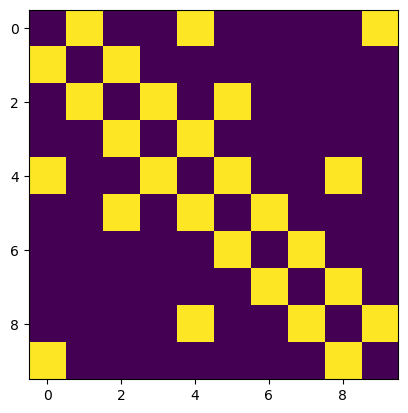

In [18]:
A = nx.adjacency_matrix(G).todense()
display(A)
plt.imshow(A);

### Add your BitString class below

In [19]:
import numpy as np
import math    
import copy as cp         

class BitString:
    def __init__(self, N):
        self.N = N
        self.config = np.zeros(N, dtype=int) 

    def __repr__(self):
        out = ""
        for i in self.config:
            out += str(i)
        return out

    def __eq__(self, other):        
        return all(self.config == other.config)
    
    def __len__(self):
        return len(self.config)

    def on(self):
        count = 0
        for i in self.config:
            if(self.config[i] == 1):
                count+=1
            
        return count
        """
        Return number of bits that are on
        """

    def off(self):
        count = 0
        for i in self.config:
            if(self.config[i] == 0):
                count+=1
            
        return count
        """
        Return number of bits that are on
        """
    def getBit(self, index):
        return self.config[index]
    def flip_site(self,i):
        if(self.config[i] == 0):
            self.config[i] = 1
        else:
            self.config[i] = 0
        """
        Flip the bit at site i
        """
    
    def integer(self):
        i = len(self.config)-1
        num = 0
        for j in self.config:
            num += self.config[j] * (2**i)
            i-=1
        return num
        """
        Return the decimal integer corresponding to BitString
        """
 

    def set_config(self, s:list[int]):
        self.config = s
        """
        Set the config from a list of integers
        """
    def __str__(self):
        out = ""
        for i in self.config:
            out += str(i)
        return out

    def set_integer_config(self, dec:int):
        my_list = []
        highest_2 = 0
        while True:
            if(2**highest_2 < dec):
                highest_2+=1
            if(2**highest_2 > dec):
                highest_2-=1
                break
            if(2**highest_2 == dec):
                break
        while dec > 0:
            if(2** highest_2 > dec):
                my_list.append(0)
                highest_2 -= 1
            else:
                my_list.append(1)
                dec -= 2**highest_2
                highest_2-=1
        len_diff = len(self.config) - len(my_list)
        while len_diff > 0:
            my_list.insert(0,0)
            len_diff-=1
        self.set_config(my_list)
        return self.config



In [ ]:
def energy(bs: BitString, G: nx.Graph):
    E = 0
    A = nx.adjacency_matrix(G).todense()
    for row in A:
        for j in row:
            if(A[row][j] == 1):
                if(bs.getBit(rows) == 0 and bs.getBit(j) == 0):
                    E += 1
                elif(bs.getBit(rows) * bs.getBit(j) == 0):
                    E -= 1
                else:
                    E +=1
   
    return E

            

    """Compute energy of configuration, `bs`

        .. math::
            E = \\left<\\hat{H}\\right>

    Parameters
    ----------
    bs   : Bitstring
        input configuration
    G    : Graph
        input graph defining the Hamiltonian
    Returns
    -------
    energy  : float
        Energy of the input configuration
    """



### Naive minimization

Loop over all configurations and compute energies to find the lowest

In [21]:
x = [i for i in range(1024)] # Store list of indices
y = [i for i in range(1024)] # Store list of energies
xmin = 0 # configuration of minimum energy configuration
emin = 0 # minimum of energy
my_bs = BitString(10)
for i in range(1024):
    my_bs.set_integer_config(i)
    y[i] = energy(my_bs, G)
    if (y[i] < emin):
        emin = y[i]
        xmin = x[i]



# Print out all the energies
plt.plot(x,y);

my_bs.set_integer_config(xmin)
print(" Lowest energy %12.8f: %s" %(emin, my_bs))
print(energy(my_bs, G))
assert(abs(energy(my_bs, G) - -9) < 1e-12)


NameError: name 'rows' is not defined

### Visualize ground state
Print out the graph again, this time coloring each node according to it's state (0 or 1)

Configuration: 0010100101


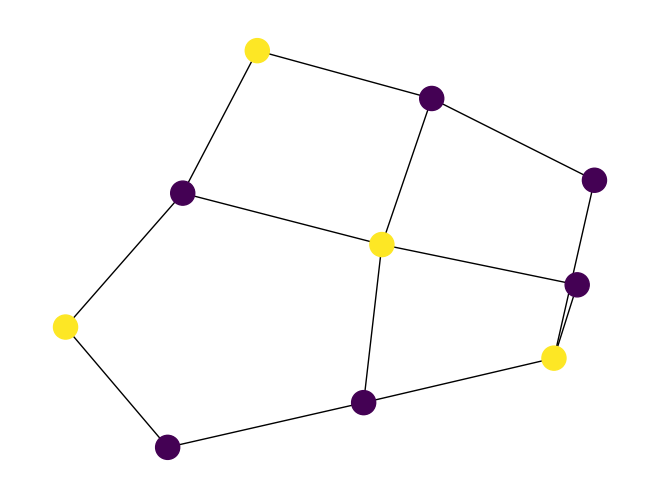

In [ ]:
print("Configuration: %s" %my_bs)
nx.draw(G, node_color=my_bs.config)